<a href="https://colab.research.google.com/github/kondwani0099/Data-Science-Machine-Learing/blob/main/Market_sales_Data_Science_Tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

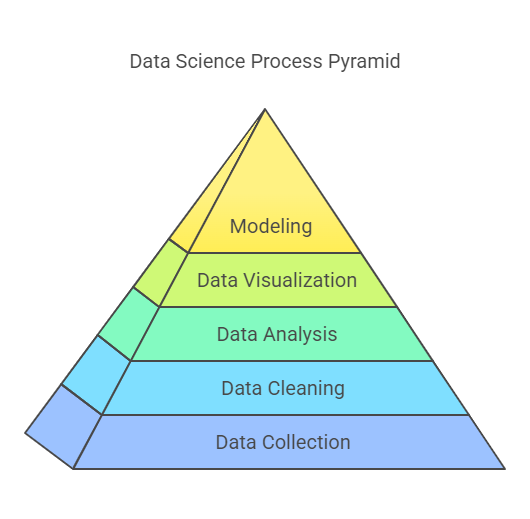

 **Market Data Analysis and Decision Tree Model Training for Profit Prediction**

This notebook provides an end-to-end approach to analyzing market data and leveraging data science techniques to train a Decision Tree model for predicting profits based on product categories and ratings. The objective is to empower businesses to make informed decisions about product lines that drive profitability.



**Step 1: Import all the libraries to be used**

In [1]:
# the libraries to use
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

**Step2 : Mount Your Google Drive to Your Notebook**

In [2]:
from google.colab import drive
drive.mount('/content/drive')
import os
os.chdir(r"/content/drive/My Drive/")

Mounted at /content/drive


In [3]:

# Path to the CSV file in Google Drive
csv_file_path = '/content/drive/My Drive/lessons/supermarket_sales.csv'

# Read data into a DataFrame
df = pd.read_csv(csv_file_path)

# Display the DataFrame
df


,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1


**Most used payment method**

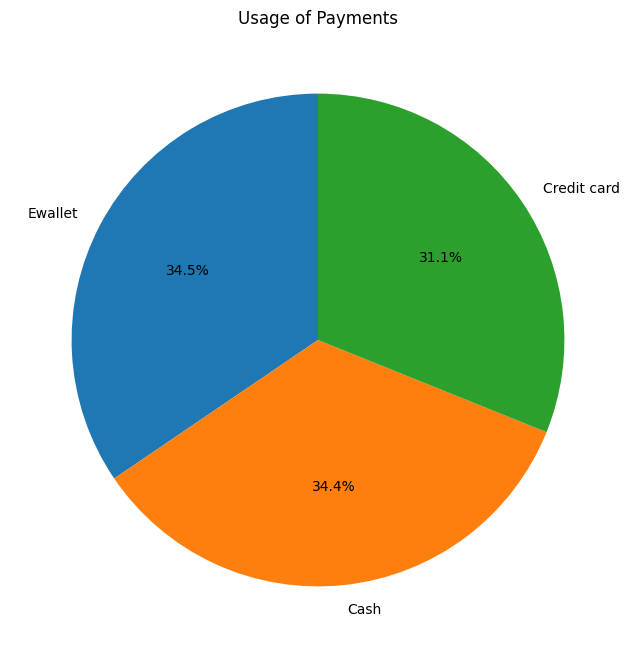

In [ ]:
# Extract the 'Payments' column
payments_data = df['Payment']

# Count the occurrences of each payment type
payment_counts = payments_data.value_counts()

# Plot a pie chart
plt.figure(figsize=(8, 8))
plt.pie(payment_counts, labels=payment_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Usage of Payments')
plt.show()



**Gender Distribution**

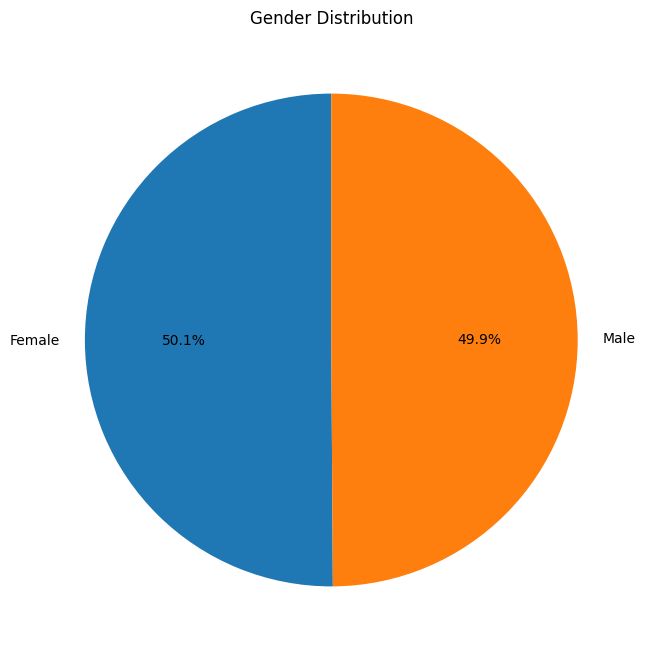

In [ ]:
# Extract the 'Gender' column
gender_data = df['Gender']

# Count the occurrences of each gender
gender_counts = gender_data.value_counts()

# Plot a pie chart for gender distribution
plt.figure(figsize=(8, 8))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Gender Distribution')
plt.show()

**Gross Income by City**

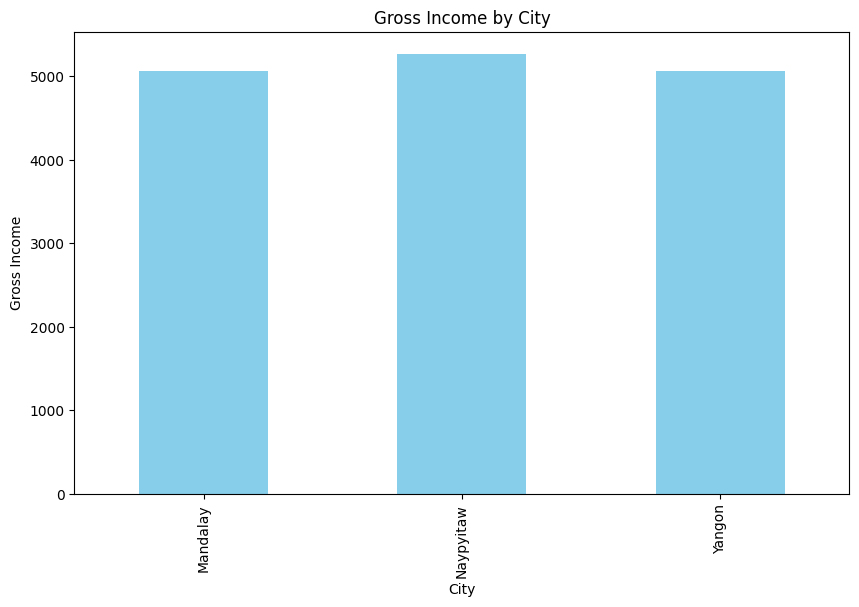

In [ ]:
# Group by 'Product Line' and sum the 'Gross Income' for each product line
product_line_income = df.groupby('City')['gross income'].sum()

# Plot a bar chart for gross income by product line
plt.figure(figsize=(10, 6))
product_line_income.plot(kind='bar', color='skyblue')
plt.title('Gross Income by City')
plt.xlabel('City')
plt.ylabel('Gross Income')
plt.show()


**Gross Income by Product Line**

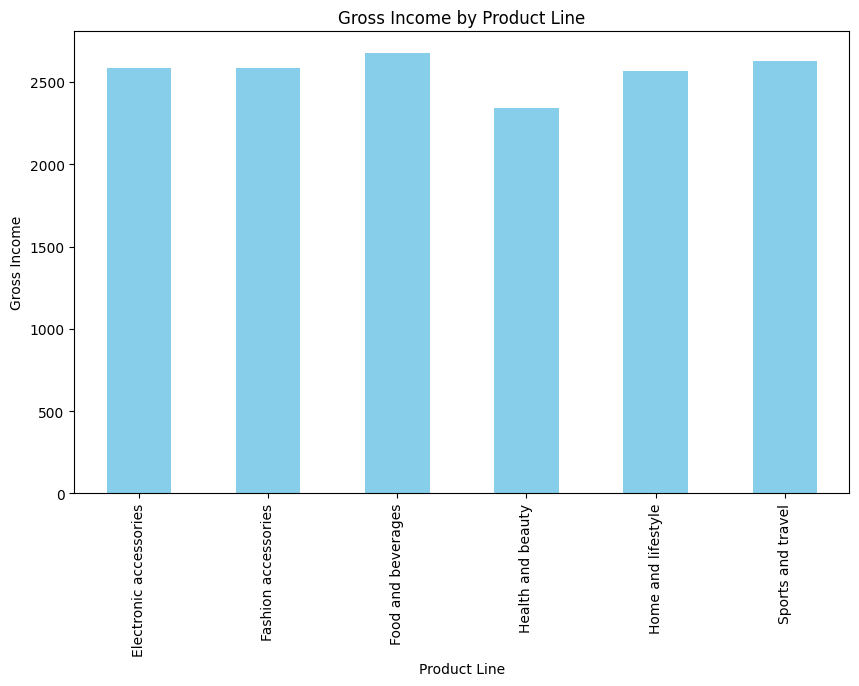

In [ ]:
# Group by 'Product Line' and sum the 'Gross Income' for each product line
product_line_income = df.groupby('Product line')['gross income'].sum()

# Plot a bar chart for gross income by product line
plt.figure(figsize=(10, 6))
product_line_income.plot(kind='bar', color='skyblue')
plt.title('Gross Income by Product Line')
plt.xlabel('Product Line')
plt.ylabel('Gross Income')
plt.show()

**Find the branch with the overall highest rating**

In [ ]:
# Find the branch with the overall highest rating
highest_rated_branch = df.loc[df['Rating'].idxmax(), 'Branch']
highest_rating = df['Rating'].max()

# Filter the DataFrame to show all other branches
other_branches_df = df[df['Branch'] != highest_rated_branch]

# Display results
print(f"The branch with the overall highest rating is {highest_rated_branch} with a rating of {highest_rating}")



The branch with the overall highest rating is C with a rating of 10.0


In [ ]:
# Find the three branches with the highest ratings

sorted_df = df.sort_values(by='Rating', ascending=False)
top_10_branches = sorted_df.head(10)[['Branch', 'Rating']]


# Display results
print("Top 3 branches:")
print(top_10_branches)

Top 3 branches:
    Branch  Rating
387      A    10.0
159      B    10.0
853      B    10.0
62       B    10.0
60       C    10.0
382      B     9.9
194      A     9.9
179      C     9.9
86       C     9.9
23       A     9.9


**Correlation Matrix**

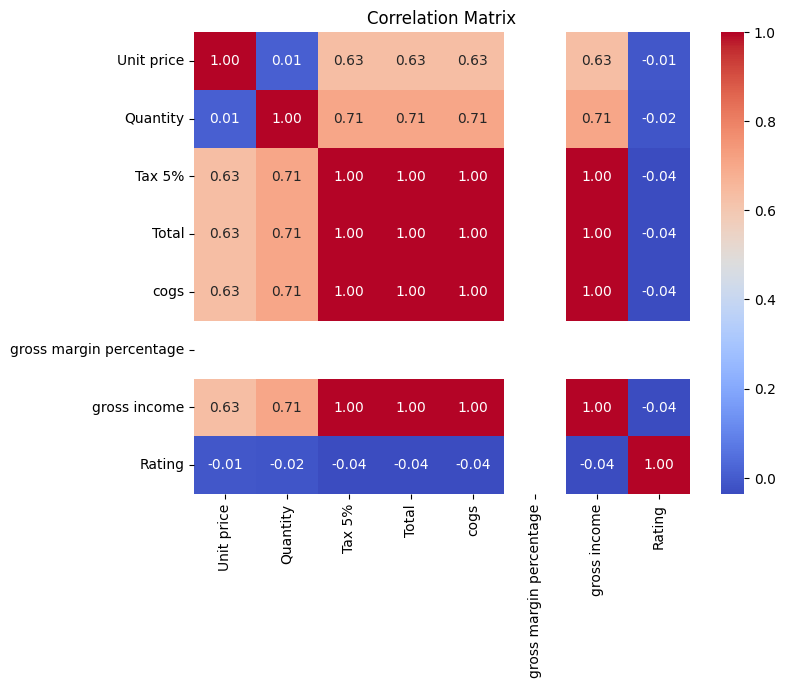

In [ ]:
# Create a correlation matrix
# correlation_matrix = df.corr()
correlation_matrix = df.corr(numeric_only=True)

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

**Training The Decision Tree Model**

Mean Squared Error: 209.5226800763198
R-squared Score: -0.42024151785660213


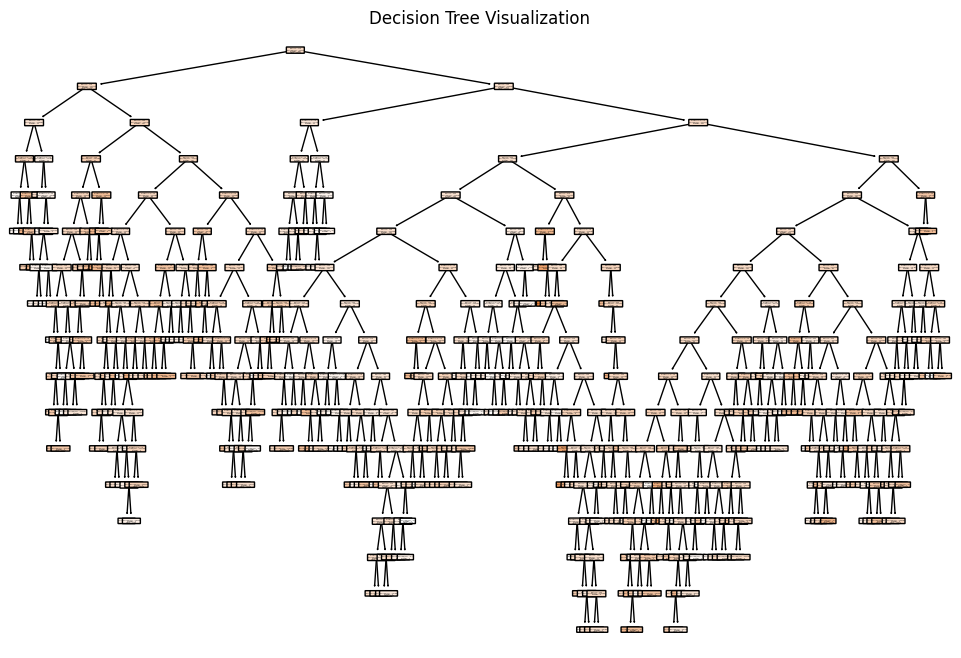

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Step 1: Load the dataset
# Uncomment the appropriate line based on your data source
# Use predefined dictionary for a small dataset
# dataa = {
#     "Product line": ["Health and beauty", "Electronic accessories", "Home and lifestyle"],
#     "Rating": [9.1, 9.6, 7.4],
#     "gross income": [26.1415, 3.82, 16.2155]
# }
data =  pd.read_csv(csv_file_path)
df = pd.DataFrame(data)

# OR load data from a CSV file
# csv_file_path = "path/to/your/csvfile.csv"
# df = pd.read_csv(csv_file_path)

# Step 2: Feature Engineering
# Target variable: Profit
df["Profit"] = df["gross income"]

# Encode Product line
encoder = LabelEncoder()
df["Product line"] = encoder.fit_transform(df["Product line"])

# Features and target
X = df[["Product line", "Rating"]]
y = df["Profit"]

# Step 3: Train-test split (skipped if dataset size < 5)
if len(df) > 5:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
else:
    X_train, X_test, y_train, y_test = X, X, y, y

# Step 4: Train Decision Tree Regressor
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

# Step 5: Evaluate the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared Score:", r2)

# Step 6: Visualize the Decision Tree
plt.figure(figsize=(12, 8))
plot_tree(model, feature_names=X.columns, filled=True, rounded=True)
plt.title("Decision Tree Visualization")
plt.show()


1. **Feature Importance:** To see which features (e.g., Product line, Rating) are most important for predicting profits.

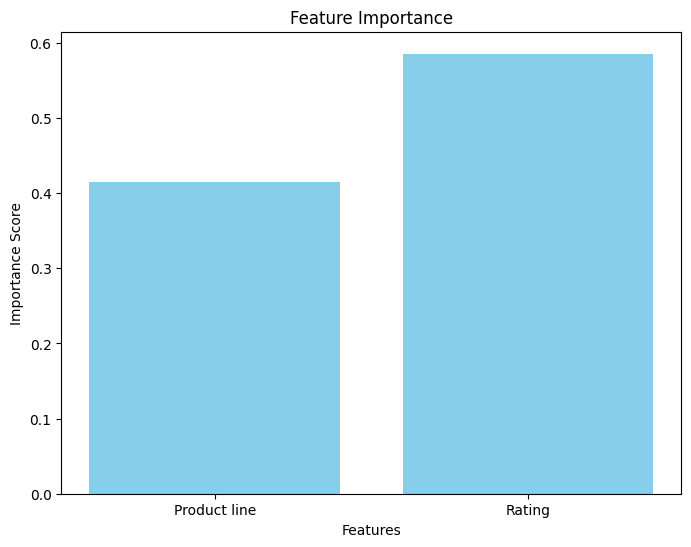

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Feature Importance Visualization
feature_importances = model.feature_importances_
plt.figure(figsize=(8, 6))
plt.bar(X.columns, feature_importances, color='skyblue')
plt.title("Feature Importance")
plt.ylabel("Importance Score")
plt.xlabel("Features")
plt.show()

2. **Actual vs. Predicted Values:** To compare the true profits (y_test) with the model's predictions (y_pred).

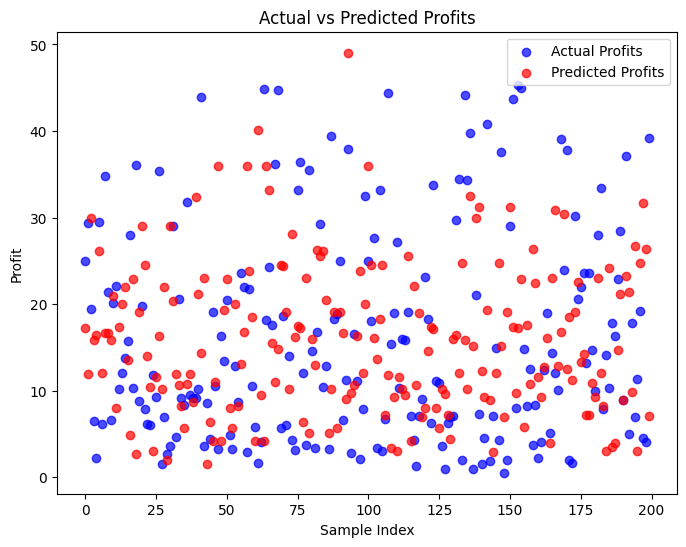

In [8]:
# Step 2: Actual vs Predicted Values
plt.figure(figsize=(8, 6))
plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual Profits', alpha=0.7)
plt.scatter(range(len(y_test)), y_pred, color='red', label='Predicted Profits', alpha=0.7)
plt.title("Actual vs Predicted Profits")
plt.xlabel("Sample Index")
plt.ylabel("Profit")
plt.legend()
plt.show()

3. **Residuals Plot:** To evaluate the errors (difference between actual and predicted values).

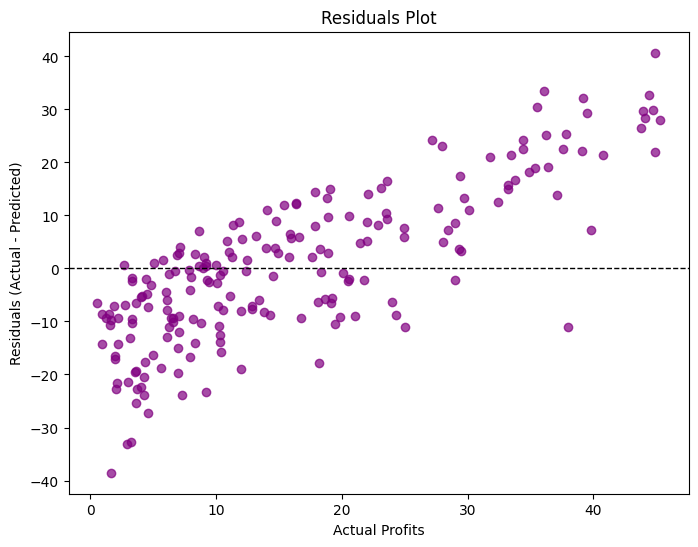

In [9]:
# Step 3: Residuals Plot
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
plt.scatter(y_test, residuals, color='purple', alpha=0.7)
plt.axhline(y=0, color='black', linestyle='--', linewidth=1)
plt.title("Residuals Plot")
plt.xlabel("Actual Profits")
plt.ylabel("Residuals (Actual - Predicted)")
plt.show()


**Save Model**

In [10]:
import joblib

# Save the trained model to a file
model_filename = "decision_tree_model.pkl"
joblib.dump(model, model_filename)
print(f"Model saved as {model_filename}")


Model saved as decision_tree_model.pkl


**Load The Model**

In [11]:
# Load the saved model
loaded_model = joblib.load(model_filename)
print("Model loaded successfully!")

# Use the loaded model for predictions
test_predictions = loaded_model.predict(X_test)
print("Test Predictions:", test_predictions)


Model loaded successfully!
Test Predictions: [17.262      11.881875   29.949      15.81616667 16.447125   26.1005
 11.97716667 16.6187     16.63525    15.86066667 20.9005      7.95766667
 17.30066667 20.001      22.01683333 13.5675      4.91       22.8955
  2.661      19.0393     28.968      24.5475     14.023375   10.4065
  3.0475     11.565      16.323      10.14575    22.01683333  1.9505
 28.968      20.372      11.918      10.678875    8.1775      5.662
 10.78516667 11.96183333  8.737875   32.41       21.114      14.30925
 23.06483333  1.56716667  6.416       4.154      11.001      36.008
  4.183      19.333      22.8955      7.95766667  5.65825    19.95875
  8.1775     13.09325    16.814      36.008      23.83275    18.468
  4.154      40.1445      9.48775     4.183      36.008      33.14625
 15.46816667 11.001      14.83666667 24.47666667 24.40133333 19.0393
 10.14575    28.074      16.236      17.50966667 17.262       6.416
 23.06483333  5.056      15.92075    12.9185     26.224

**Code to Predict Based on User Input**

In [16]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeRegressor
import joblib

# Load the saved model
model_filename = "decision_tree_model.pkl"
loaded_model = joblib.load(model_filename)
print("Model loaded successfully!")

# Define the product line encoder (reuse the same encoder used during training)
encoder = LabelEncoder()
encoder.fit(["Health and beauty", "Electronic accessories", "Home and lifestyle"])  # Original categories

# Take user input
product_line = input("Enter the product line (e.g., Health and beauty, Electronic accessories, Home and lifestyle): ")
rating = float(input("Enter the product rating (e.g., 9.5): "))

# Encode the product line
encoded_product_line = encoder.transform([product_line])[0]

# Create a DataFrame for the input
user_input = pd.DataFrame([[encoded_product_line, rating]], columns=["Product line", "Rating"])

# Predict the profit
predicted_profit = loaded_model.predict(user_input)[0]

# Display the result
print(f"The predicted profit for the product line '{product_line}' with a rating of {rating} is: {predicted_profit:.2f}")


Model loaded successfully!
Enter the product line (e.g., Health and beauty, Electronic accessories, Home and lifestyle): Health and beauty
Enter the product rating (e.g., 9.5): 4.5
The predicted profit for the product line 'Health and beauty' with a rating of 4.5 is: 36.01
